# Pandas
In this notebook, we'll encounter a very useful package for scientific computing in Python: Pandas. We can think of Pandas as "numpy with labels". This package is especially useful for data science and biology for a few reasons:
* Great for real-world, heterogeneous data
* Similar to Excel spreadsheets (but way faster!)
* Smartly deals with missing data

### At the end of this notebook, you'll be able to:
* Create & manipulate Pandas dataframes
* Load a tabular file of genetic data into a Pandas dataframe
* Index and subset Pandas dataframes
* Generate descriptive statistics for Pandas dataframes
<hr>

## Importing packages

Before we can pandas, we need to import it. The convention is to import `pandas` as `pd`.

In [1]:
# Import packages
import pandas as pd

# Use whos 'magic command' to see available modules
%whos

Variable   Type      Data/Info
------------------------------
pd         module    <module 'pandas' from '/A<...>ages/pandas/__init__.py'>


## Create and Manipulate Dataframes 
The two data structures of Pandas are the `Series` and the `DataFrame`. A `Series` is a one-dimensional onject similar to a list. A `DataFrame` can be thought of as a two-dimensional numpy array or a collection of `Series` objects. Series and dataframes can contain multiple different data types such as integers, strings, and floats, similar to an Excel spreadsheet. Pandas also supports `string` lables unlike numpy arrays which only have numeric labels for their rows and columns. For a more in depth explanation, please visit the [Introduction to Data Structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) section in the Pandas User Guide. 

You can create a Pandas dataframe by inputting dictionaries into the Pandas function `pd.DataFrame()`, by reading files, or through functions built into the Pandas package. The function [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) reads a comma- or tab-separated file and returns it as a `dataframe`.

### Creating a data from a dictionary

Below, we'll create a dataframe from a dictionary. Since this is quite a bit to fit into one cell, we're also using a trick where we use a pair of open parentheses to tell Python to *ignore* the line breaks here.

In [4]:
# Create the dictionary
students = (
  {'FIRST_NAME': ['Daniel', 'Ben', 'Kavita', 'Linda',
                  'Omar','Jane', 'Felicia', 'Rachel',
                  'Bob'],
   'LAST_NAME': ['Smith', 'Leibstrom', 'Kanabar', 'Thiel',
                 'Reichel', 'OConner', 'Rao', 'Crock',
                 'McDonald'],
   'YEAR': [1, 1, 1, 4, 2, 2, 3, 1, 1],
   'HOME_STATE': ['NY', 'NY', 'PA', 'CA', 'OK', 'HI',
                  'NY','FL', 'FL'],
   'AGE': [18, 19, 19, 22, 21, 19, 20, 17, 18],
   'CALC_101_FINAL': [90, 80, None, 60, 70, None, None,
                      None, 98],
   'ENGLISH_101_FINAL': [80, None, None, 40, 50, None,
                         None, 60, 65]} )

# Create the dataframe from our dictionary
students_df = 
students_df

,FIRST_NAME,LAST_NAME,YEAR,HOME_STATE,AGE,CALC_101_FINAL,ENGLISH_101_FINAL
0,Daniel,Smith,1,NY,18,90.0,80.0
1,Ben,Leibstrom,1,NY,19,80.0,NaN
2,Kavita,Kanabar,1,PA,19,NaN,NaN
3,Linda,Thiel,4,CA,22,60.0,40.0
4,Omar,Reichel,2,OK,21,70.0,50.0
5,Jane,OConner,2,HI,19,NaN,NaN
6,Felicia,Rao,3,NY,20,NaN,NaN
7,Rachel,Crock,1,FL,17,NaN,60.0
8,Bob,McDonald,1,FL,18,98.0,65.0


We can access a list of all of the students' last names using the following notation: `df['column_name']`.

In [5]:
# Access LAST_NAME column
lastnames = 
lastnames

0        Smith
1    Leibstrom
2      Kanabar
3        Thiel
4      Reichel
5      OConner
6          Rao
7        Crock
8     McDonald
Name: LAST_NAME, dtype: object

One column of the dataframe is a **series**.

In [6]:
# Check type of column
type(lastnames)

pandas.core.series.Series

### Reading from a file example
Below we will create a dataframe by reading the file `mouse_cell_metrics.csv` which contains information on different cell types in the mouse. We'll use the `read_csv` function to import our gene expression data as a DataFrame.

>**About this dataset:**
This dataset was curated from data from [The Allen Institute for Brain Science](https://alleninstitute.org/what-we-do/brain-science/). You can play with this data and more [on their website](https://portal.brain-map.org/).  

First, we'll use a package called `urllib` to download the data.

In [4]:
import urllib.request

data_url = 'https://raw.githubusercontent.com/ajuavinett/CellTypesLesson/master/utilities/mouse_cell_metrics.csv'

What would happen if we ran `data_url`?

a) open the link

b) error

c) print string of url

d) nothing

In [5]:
data, headers = urllib.request.urlretrieve(data_url, 'cell_data.txt')

Now, we can use `pd.read_csv` function to import our data as a `data_df`.

In [6]:
# Read in the list of lists as a data frame
# Note "delimiter" from loadtxt is "sep" here
data_df = 

#Show the first five rows
data_df.head()

,cell_surface_area,dendrite_type,rheobase,input_resistance,tau
0,542.046417,aspiny,629.999997,107.630696,5.515311
1,494.036230,aspiny,29.999999,209.605296,62.705039
2,302.248338,aspiny,50.000001,594.843904,10.239005
3,605.346305,aspiny,50.000001,218.831968,45.660687
4,298.096557,spiny,30.000002,338.629120,35.177373


As you can see in the first five rows of the dataset above, this dataset contains observations about the following features:

* (estimated) cell surface area (in µm^2)
* dendrite type (spiny, aspiny, or sparsely spiny)
* rheobase (in nA)
* input resistance (in MOhms)
* tau (in ms)

Each row is a different cell that was recorded and measured.

Below, we'll start manipulating the dataset so that we can see whether these features are related.

## Indexing Dataframes

Indexing in Pandas works slightly different than in NumPy. Similar to a dictionary, we can index dataframes by their names. 

The syntax for indexing single locations in a dataframe is `dataframe.loc[row_label,column_label]`. To index an individual column, we use the shorthand syntax `dataframe.[column_label]`. To index an individual row, we use the syntax `dataframe.loc[row_label]`. To index by index #, we use the syntax `dataframe.iloc[index_number]`. Below are some examples on how to access rows, columns, and single values in our dataframe. For more information on indexing dataframes, visit the <a href = "https://pandas.pydata.org/docs/user_guide/indexing.html#indexing"> "Indexing and selecting data"</a> section in the Pandas User Guide.

In [8]:
# Select a single column
cell_surface_area = 

# What will cell_surface_area look like?

cell_surface_area

0      542.046417
1      494.036230
2      302.248338
3      605.346305
4      298.096557
          ...    
206    340.474591
207    603.481275
208    449.498683
209    454.638999
210    277.366737
Name: cell_surface_area, Length: 211, dtype: float64

In [12]:
# Select a single row


cell_surface_area    542.046
dendrite_type         aspiny
rheobase                 630
input_resistance     107.631
tau                  5.51531
Name: 0, dtype: object

In [15]:
# Select an individual value 


542.0464165551457

To select multiple different columns, you can use a `list` of all your columns of interest as so:

## Subsetting dataframes

Like NumPy arrays, we can subset our original dataframe to only include data that meets our criteria. Our dataframe has data on multiple different brain areas with many gene expression values. You can filter this dataframe using the following syntax:
```
new_df = original_df[original_df['Column of Interest'] == 'Desired Value']
```
In plain english, what this is saying is: save a dataframe from the original dataframe, where the original dataframe values in my Column of Interest are equal to my Desired Value. For more information on subsetting,  visit the <a href = "https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html"> "How do I select a subset of a DataFrame"</a> section in the Pandas documentation. 

In [9]:
data_df

,cell_surface_area,dendrite_type,rheobase,input_resistance,tau
0,542.046417,aspiny,629.999997,107.630696,5.515311
1,494.036230,aspiny,29.999999,209.605296,62.705039
2,302.248338,aspiny,50.000001,594.843904,10.239005
3,605.346305,aspiny,50.000001,218.831968,45.660687
4,298.096557,spiny,30.000002,338.629120,35.177373
...,...,...,...,...,...
206,340.474591,sparsely spiny,90.000000,173.966800,24.975323
207,603.481275,aspiny,150.000000,191.230304,22.133813
208,449.498683,sparsely spiny,70.000000,235.617120,23.790069
209,454.638999,aspiny,30.000002,342.283840,20.173749


In [16]:
# Create a dataframe with only aspiny neurons
aspiny_cells = 

# What will aspiny_cells contain?

aspiny_cells

,cell_surface_area,dendrite_type,rheobase,input_resistance,tau
0,542.046417,aspiny,629.999997,107.630696,5.515311
1,494.036230,aspiny,29.999999,209.605296,62.705039
2,302.248338,aspiny,50.000001,594.843904,10.239005
3,605.346305,aspiny,50.000001,218.831968,45.660687
5,479.567157,aspiny,190.000002,192.516256,11.871757
...,...,...,...,...,...
204,333.032748,aspiny,370.000000,153.565792,7.551964
205,443.954272,aspiny,70.000000,258.008800,36.373969
207,603.481275,aspiny,150.000000,191.230304,22.133813
209,454.638999,aspiny,30.000002,342.283840,20.173749


## DataFrame Methods

Pandas has many useful methods that you can use on your data, including `describe`, `mean`, and more. To learn more about all the different methods that can be used to manipulate and analyze dataframes, please visit the <a href = "https://pandas.pydata.org/docs/user_guide/index.html"> Pandas User Guide </a>. We will demonstrate some of these methods below. 

The `describe` method returns descriptive statistics of all the columns in our dataframe. 

,cell_surface_area,rheobase,input_resistance,tau
count,211.000000,211.000000,211.000000,211.000000
mean,496.922279,165.687203,235.102125,15.418434
std,200.701162,134.638411,113.749420,11.271569
min,138.311378,20.000000,84.812208,3.944188
25%,360.111411,69.999999,168.205072,8.092669
50%,478.651560,129.999997,209.605296,11.573595
75%,578.526730,234.999999,268.665464,18.410931
max,1358.917278,800.000011,955.148736,74.898731


The `mean` and `std` method return the mean and standard deviation of each column in the dataframe, respectfully. 

> **Task**: Determine whether any two metrics in this data (cell_surface_area, rheobase, input_resistance, or tau) are correlated by plotting them with `plt.scatter(x,y)` where `x` and `y` are your two metrics. Use the [scatter documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) if you need to.

Text(0, 0.5, 'tau')

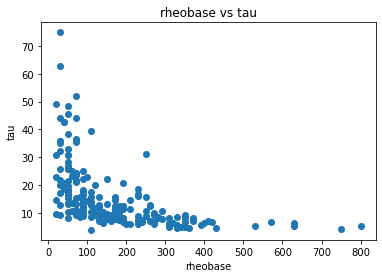

In [13]:
# Plot your data here

import matplotlib.pyplot as plt


In [10]:
# Final step: celebrate!
from IPython.display import HTML
HTML('<img src="https://media.giphy.com/media/l0MYt5jPR6QX5pnqM/giphy.gif">')

<hr>

## Additional resources
See the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) for a more in depth exploration of Pandas, and of course, the [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html).